**Lab #2**
Daniel Sadig

Student ID: 500894225
section Number: 032

     biasCol       sbp   tobacco       ldl  adiposity     typea   obesity  \
0          1  1.057417  1.821099  0.477894  -0.295183 -0.418017 -0.176594   
1          1  0.276789 -0.789382 -0.159507   0.411694  0.193134  0.670646   
2          1 -0.991731 -0.774141 -0.608585   0.883374 -0.112441  0.734723   
3          1  1.545310  0.841352  0.806252   1.622382 -0.214300  1.411091   
4          1 -0.211103  2.169453 -0.598928   0.305020  0.702427 -0.012842   
..       ...       ...       ...       ...        ...       ...       ...   
457        1  3.692037 -0.704470  0.598614   0.811401  1.109862  0.570971   
458        1  2.130781  0.122871 -0.159507   0.860240 -0.112441  0.608942   
459        1 -1.479624 -0.138395 -1.521228  -1.307946 -1.334744 -1.413043   
460        1 -0.991731  0.384137  3.317227   0.691875  1.109862  0.309916   
461        1 -0.308682 -0.791559  0.038474   1.028605  0.906144 -2.692210   

      alcohol       age  famhist_Present  
0    3.274189  0.628654         

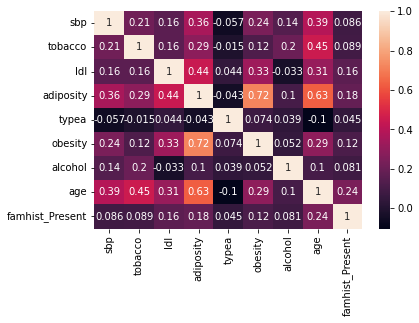

In [ ]:
  from matplotlib import axis
  import pandas as pd;
  import numpy as np
  from sklearn.datasets import load_iris
  from sklearn.preprocessing import StandardScaler
  import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import random
import seaborn as sn
import math
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

#------------------- One Hot Encoding ------------------
data = pd.get_dummies(df, columns=['famhist','chd'], drop_first=True)



newdf = data.drop("row.names", axis='columns') #Removing row names coloumn
y_act = data['chd_1']


X =  newdf.drop("chd_1", axis='columns')
y = data['chd_1']

# ------- Standardized X and add biased row ---------#
meanCol = X.loc[:,X.columns!='famhist_Present'].mean()
stdCol = X.loc[:,X.columns!='famhist_Present'].std()

stdX = (X.loc[:,X.columns!='famhist_Present'] - meanCol)/stdCol
stdX.insert(loc=0,column="biasCol",value=1)
stdX['famhist_Present'] = X['famhist_Present']
print(stdX)


#--------- Hypothesis Model (Sigmoid) ---#
def sigmoid(z):
  return 1/(1 + np.exp(-z))

#--------- Cost Function ---#
def cost_func(theta, X, y):
  m = len(y)
  h = sigmoid(X.dot(theta))
  J = (-1/m) * (y.dot(np.log(h) + (1-y).dot(np.log(1-h))))
  return J



def gradient(theta, X, y, epoch, alph):
  
  m = len(y)
  Err_arr = []
  for i in range(epoch):
    h = sigmoid(X.dot(theta))
    theta = theta + alph*(1/m) * X.T.dot(y - h)
    
    Err_arr.append(cost_func(theta, X, y))
  

  plt.plot(Err_arr, "-r")

  plt.xlabel("Iteration Number")
  plt.ylabel("Error")

  plt.title(f'Error per Iteration iter = {epoch} alpha = {alph}') 
  plt.show()
  return (theta)


#---------- Iitalize Randome Variables ------#

initial_theta = [0]*10;
random.seed(123)
for i in range(len(initial_theta)):
  initial_theta[i] = random.random()




##-----------Q1: Calculating the percentage of ones -----------
num_ones = np.count_nonzero(y_act == 1)
print(f"\n\n\nThis numbes of ones is: {num_ones}")
print(f"% of ones: {num_ones/462}")


##----------- Calculating the percentage of ones -----------
print(f"\n\n\n Number of missing rows {df['row.names'][len(df)-1] - len(df)}")

print("------------------------------------------------------- \n\n")
#Printin correlation matrix
print("\n\nCorrelation matrix")
corr_matrix = X.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()




**Q: How Many categorical variavles do you have in your feature**

we have one categorical variable: family history

**Batch Gradient Descent alpha = 0.001**

[0.052363598850944326, 0.08718667752263232, 0.4072417636703983, 0.10770023493843905, 0.9011988779516946, 0.0381536661023224, 0.5362020400339269, 0.33219769850967984, 0.8520866189293687, 0.1596623967219699]
 ------------- alpha = 0.001 epoch = 5000 --------


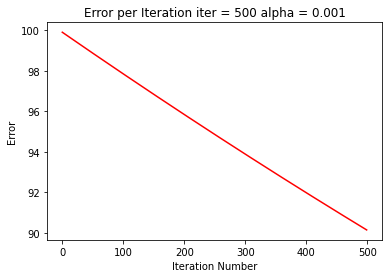

biasCol           -0.037998
sbp                0.060889
tobacco            0.392471
ldl                0.093653
adiposity          0.814749
typea              0.066858
obesity            0.453132
alcohol            0.299508
age                0.805762
famhist_Present    0.131651
dtype: float64
[0.052363598850944326, 0.08718667752263232, 0.4072417636703983, 0.10770023493843905, 0.9011988779516946, 0.0381536661023224, 0.5362020400339269, 0.33219769850967984, 0.8520866189293687, 0.1596623967219699]
 ------------- alpha = 0.001 epoch = 1000 --------


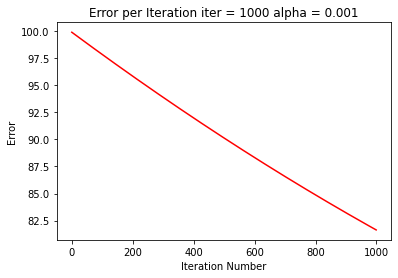

biasCol           -0.120673
sbp                0.038290
tobacco            0.378635
ldl                0.083476
adiposity          0.735115
typea              0.093409
obesity            0.375782
alcohol            0.269043
age                0.764006
famhist_Present    0.108087
dtype: float64
 ------------- alpha = 0.001 epoch = 10 000 --------


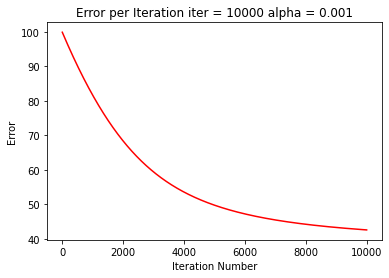

biasCol           -0.727211
sbp                0.043130
tobacco            0.326662
ldl                0.230811
adiposity          0.241005
typea              0.302942
obesity           -0.156841
alcohol            0.049541
age                0.598844
famhist_Present    0.154604
dtype: float64


In [ ]:
print(initial_theta)
print(" ------------- alpha = 0.001 epoch = 5000 --------")
print(gradient(initial_theta, stdX, y, 500, 0.001))

print(initial_theta)
print(" ------------- alpha = 0.001 epoch = 1000 --------")
print(gradient(initial_theta, stdX, y, 1000, 0.001))


print(" ------------- alpha = 0.001 epoch = 10 000 --------")
print(gradient(initial_theta, stdX, y, 10000, 0.001))



**Batch Gradient Descent alpha = 0.0001**




 ------------- alpha = 0.0001 epoch = 5000 --------


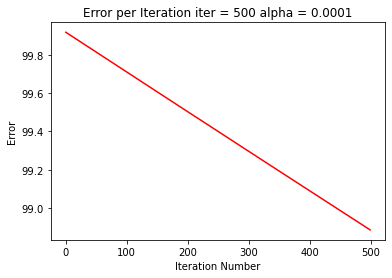

biasCol            0.042992
sbp                0.084403
tobacco            0.405732
ldl                0.106128
adiposity          0.892271
typea              0.041117
obesity            0.527660
alcohol            0.328837
age                0.847265
famhist_Present    0.156667
dtype: float64
 ------------- alpha = 0.0001 epoch = 1000 --------


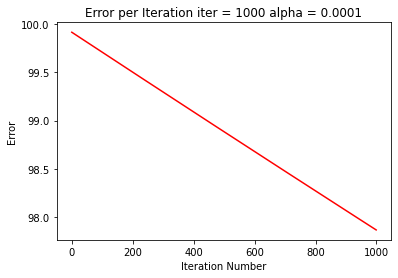

biasCol            0.033693
sbp                0.081652
tobacco            0.404228
ldl                0.104592
adiposity          0.883404
typea              0.044060
obesity            0.519169
alcohol            0.325495
age                0.842483
famhist_Present    0.153714
dtype: float64
 ------------- alpha = 0.0001 epoch = 10 000 --------


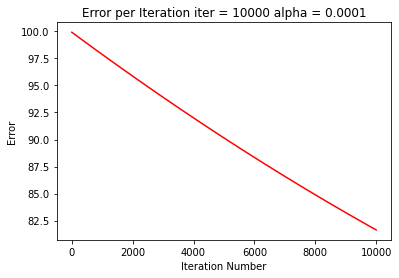

biasCol           -0.120661
sbp                0.038296
tobacco            0.378637
ldl                0.083482
adiposity          0.735126
typea              0.093406
obesity            0.375791
alcohol            0.269047
age                0.764013
famhist_Present    0.108094
dtype: float64


In [ ]:
print(" ------------- alpha = 0.0001 epoch = 5000 --------")
print(gradient(initial_theta, stdX, y, 500, 0.0001))


print(" ------------- alpha = 0.0001 epoch = 1000 --------")
print(gradient(initial_theta, stdX, y, 1000, 0.0001))


print(" ------------- alpha = 0.0001 epoch = 10 000 --------")
print(gradient(initial_theta, stdX, y, 10000, 0.0001))

**Mini Batch**

In [ ]:
import random
def random_order():
  #Randomizes the order of the array
  shuffeledDf = newdf.iloc[np.random.permutation(len(newdf))]
  

  shufX =  shuffeledDf.drop("chd_1", axis='columns')
  y = shuffeledDf['chd_1']

  # Standardized X and add biased row
  meanCol = shufX.loc[:,shufX.columns!='famhist_Present'].mean()
  stdCol = shufX.loc[:,shufX.columns!='famhist_Present'].std()

  stdShufX = (shufX.loc[:,shufX.columns!='famhist_Present'] - meanCol)/stdCol
  stdShufX.insert(loc=0,column="biasCol",value=1)
  stdShufX['famhist_Present'] = shufX['famhist_Present']

  return[stdShufX, y]

def MiniBath_gradient(theta, m, epoch, alph, batch_size):
  
  Err_arr = []
  for i in range(epoch):
    mini_batch = random_order()
    miniX = mini_batch[0]
    miniY = mini_batch[1]
    a = 0 
    b = 50
    for i in range(math.ceil(m/batch_size)):
      X = miniX[a:b]
      y = miniY[a:b]
      n = len(y)
      h = sigmoid(X.dot(theta))
      theta = theta + alph*(1/n) * X.T.dot(y - h)
      Err_arr.append(cost_func(theta, X, y))
      if(a+50 < m):
        a += 50
        b += 50
      else:
        a += 50
        b = len(X)-1

  plt.plot(Err_arr, "-r")

  plt.xlabel("Iteration Number")
  plt.ylabel("Error")

  plt.title(f'Error per Iteration iter = {epoch} alpha = {alph}') 
  plt.show()
  return (theta)



**Mini Batch Results**

 ------------- alpha = 0.001 epoch = 500 --------


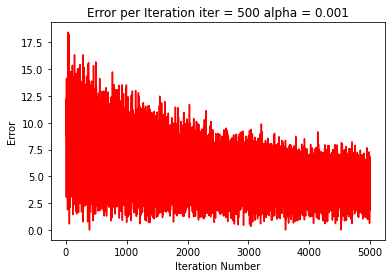

biasCol           -0.530525
sbp               -0.012867
tobacco            0.319490
ldl                0.118497
adiposity          0.361068
typea              0.230700
obesity           -0.011752
alcohol            0.112459
age                0.601024
famhist_Present    0.059888
dtype: float64
 ------------- alpha = 0.001 epoch = 1000 --------


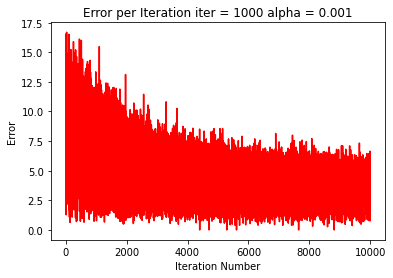

biasCol           -0.727490
sbp                0.042534
tobacco            0.328228
ldl                0.230287
adiposity          0.240992
typea              0.301001
obesity           -0.155137
alcohol            0.048087
age                0.598717
famhist_Present    0.153029
dtype: float64
 ------------- alpha = 0.001 epoch = 10000 --------


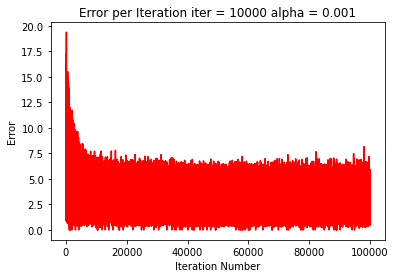

biasCol           -1.236516
sbp                0.131167
tobacco            0.359940
ldl                0.361005
adiposity          0.142933
typea              0.389019
obesity           -0.263811
alcohol            0.005807
age                0.662078
famhist_Present    0.884744
dtype: float64


In [ ]:
print(" ------------- alpha = 0.001 epoch = 500 --------")
print(MiniBath_gradient(initial_theta, len(y), 500, 0.001, 50))

print(" ------------- alpha = 0.001 epoch = 1000 --------")
print(MiniBath_gradient(initial_theta, len(y), 1000, 0.001, 50))

print(" ------------- alpha = 0.001 epoch = 10000 --------")
print(MiniBath_gradient(initial_theta, len(y), 10000, 0.001, 50))

**Mini Batch 0.0001**

 ------------- alpha = 0.0001 epoch = 500 --------


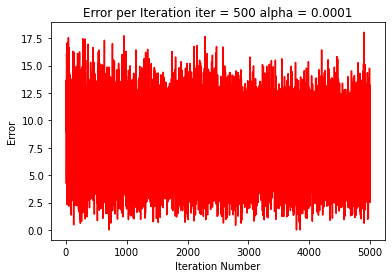

biasCol           -0.038381
sbp                0.060932
tobacco            0.392452
ldl                0.093885
adiposity          0.814733
typea              0.066912
obesity            0.453098
alcohol            0.299384
age                0.805736
famhist_Present    0.131539
dtype: float64
 ------------- alpha = 0.0001 epoch = 1000 --------


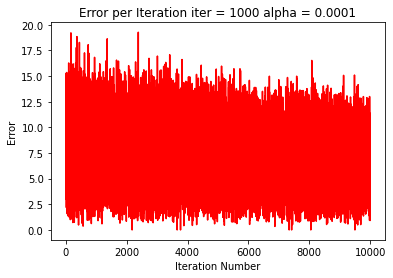

biasCol           -0.120296
sbp                0.038252
tobacco            0.378622
ldl                0.083498
adiposity          0.735269
typea              0.094306
obesity            0.376012
alcohol            0.268774
age                0.764386
famhist_Present    0.108599
dtype: float64
 ------------- alpha = 0.0001 epoch = 10000 --------


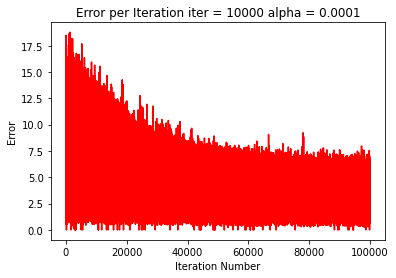

biasCol           -0.726553
sbp                0.042948
tobacco            0.326268
ldl                0.230129
adiposity          0.240644
typea              0.303294
obesity           -0.155843
alcohol            0.049573
age                0.598900
famhist_Present    0.154256
dtype: float64


In [ ]:
print(" ------------- alpha = 0.0001 epoch = 500 --------")
print(MiniBath_gradient(initial_theta, len(y), 500, 0.0001, 50))

print(" ------------- alpha = 0.0001 epoch = 1000 --------")
print(MiniBath_gradient(initial_theta, len(y), 1000, 0.0001, 50))

print(" ------------- alpha = 0.0001 epoch = 10000 --------")
print(MiniBath_gradient(initial_theta, len(y), 10000, 0.0001, 50))

**Verification**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing


tmp = pd.get_dummies(df, columns=['famhist','chd'], drop_first=True)
tmpdf = data.drop("row.names", axis='columns')
print(y_act)
X = tmpdf.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)

# classifier = make_pipeline(StandardScaler(), LogisticRegression())
classifier = (LogisticRegression())
# Fit model to training data
classifier.fit(X_scaled, y_train)
# print(classifier.set_params)
# model = LogisticRegression(solver='liblinear', random_state=0).fit(newdf, y_act)
print(classifier.intercept_)
print(classifier.coef_)

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd_1, Length: 462, dtype: uint8
[-0.87319954]
[[ 0.04537543  0.45726661  0.27666393  0.25546918  0.51365354 -0.35154347
  -0.03888021  0.68317204  0.38935767]]


**Closes Results**

For Batch with a learning rate of 0.001 (faster learning rate) the closes theta values happen during 10 000 epochs. These values are closest to the ones we got in sklearn.

For Batch with a learning rate of 0.0001 the closest theta values happens during the 10 000 epochs, but these values are still far from the correct values. So we need more iterations to get a better approximation

For Mini Batch with a learning rate of 0.001 (Faster learning rate) the closest theta values happen during the 1000 iterations. This makes sense because mini-bath updates the theta values 10 times per epoch iteration. Therfore it will reach a better approximation faster. However, the 10 000 iterations overshoots the correct values

For Minibatch with a learning rate if 0.0001 the closes values for thetat occur during the 10 000 iterations. These values are much better than the ones we got for regular batch with a similar learning rate and iteration size.

**Comparing Mini-Batch and Batch**

From the graph results we see that mini batch has more fluctuiation in the cost fuinction. This is becasue mini-batch only takes a small sample size of the data before it recalculates the new theta values. This allows us to reach a better approximation faster than Batch gradient descent. we can see this from the graphs above, our values are closest to the ones perdicted with skLearn for alpha = 0.0001, epoch = 10,000 in Bath and alpha = 0.0001, epoch = 1000 in mini-batch. It took mini batch approximily 10 times less iterations to reach the same result as the batch gradient descent.

 However, it is a less accurate result since you are only utilizing a small proption of the data set each time. Also, since there are more theta approximations our cost function will also have more uncertainty. However, allthoug mini-batch does reach a final theta value faster, it is less accurate than Batch. Also, unlike batch each epoch will utilize a random order to values, that is why the results will not be constant for each run. Opposed to Batch wich uses the whole dataset, this means that the final theta values will be the same for every run.

